# Data-set helper

## 1.0 Introduction
This notebook is to help the author with automating various tasks on his computer. These were to resize various images and to check if there weren't accidently files in both the training and model test folder. Chapter 2 will concern automatically resizing all the pictures to any size desired. We reduced the resolution so the images could be stored onto a google drive map.

In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


c:\Users\Richie\anaconda3\envs\AItech\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Richie\anaconda3\envs\AItech\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Richie\anaconda3\envs\AItech\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\Richie\anaconda3\envs\AItech\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## 2.0 Resize images
Here to resize the images. Change the paths of the images and the folder for the new images. Also specify the dimension of the image. We copy pasted the original image to paint and then checked the dimensions.

In [19]:
#paths old and new
path = "C:/Users/Richie/Desktop/MsC_CME_2/Graduation/Witteveen_data/04-Test_uploads/OneDrive_1_7-4-2022/old_im" 
newpath="C:/Users/Richie/Desktop/MsC_CME_2/Graduation/Witteveen_data/04-Test_uploads/OneDrive_1_7-4-2022/new_im"

dir_list = os.listdir(path)

#Create list to store all names in the folder
names=[]
for name in dir_list:
    names.append(name) 

#Specify dimension
down_width = 1282
down_height = 963
down_points = (down_width, down_height)

#create function to resize and save image to a path
def Save_im(x):
    image = cv2.imread(path+f'/{name}')
    resized_down = cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)
    cv2.imwrite(f"{newpath}/{name}", resized_down) 
    
#Create loop
for name in names:
    Save_im(name)

## 3.0 Create data frames of data
We create three data-sets in total, two for classifications and one for object detection. The classification was divided into one with four classes and one with 6 classes. The data-sets were checked by an expert and adjusted to his findings.
### 3.1 Classification 4 classes
Make sure the paths to all the classification folders are correct. In the dictionary called **data** put the folder containing the largest amount of files to the front.

In [2]:
#Paths of all relevant classification folders 
classification_path='C:/Users/Richie/Desktop/MsC_CME_2/Graduation/Witteveen_data/03-Foto/01-Classification/'

metal_trainG= classification_path+'TRAIN/Metal_Good'
metal_trainB=classification_path+'TRAIN/Metal_Bad'
grass_train=classification_path+'TRAIN/Grass'
rock_train=classification_path+'TRAIN/Rock'

#Create list with contents
m_train_listG=os.listdir(metal_trainG)
m_train_listB=os.listdir(metal_trainB)
g_train_list=os.listdir(grass_train)
r_train_list=os.listdir(rock_train)

#For the model test set
Test='C:/Users/Richie/Desktop/MsC_CME_2/Graduation/Witteveen_data/04-Test_uploads/Test'
test_list=os.listdir(Test)

#create a dictionary
data={"M_bad":m_train_listB,"M_good":m_train_listG,"Grass":g_train_list,"Rock":r_train_list,"Test":test_list}

#### Functions needed

In [3]:
#make sure the column with the largest data is in front

def create_df(dictionary):
    #amount=[]
    maxnum=0
    for k in dictionary:
        print(k,len(dictionary[f"{k}"]))
        #amount.append(len(dictionary[f"{k}"]))
        if maxnum<len(dictionary[f"{k}"]):       
            maxnum=len(dictionary[f"{k}"])
    index=[x for x in range(maxnum)]         #Will store the indexes for the amount of rows

    #Create dataframe 
    df = pd.DataFrame(index=index)
    for k in dictionary:
        df[f"{k}"]=pd.Series(dictionary[f"{k}"])
    return df

#function to only add .jpg files
def add_jpg(orig_list):
    newlist=[]
    for names in orig_list:
        if names.endswith('.jpg')==True:
            newlist.append(names)
    return newlist

#Check the amount of duplicates
def Check_duplicates(dataframe):
    counter=0
    for i in range(len(dataframe.columns)-1):             #iterate through the columns of the dataframe minus the last step
        df2=dataframe.copy(deep=True)                     #Create a copy of the df to compare
        df2.drop(df2.columns[:i+1], axis=1, inplace=True) #drop the column of interest and all previous columns in previous stepsthat we will want to check in the copied df
        for name in dataframe.iloc[:,i]:                  #iterate through the values of the column of interest
            for row in range(df2.shape[0]):            
                for col in range(df2.shape[1]):         
                    if name==df2.iloc[row,col] and df2.iloc[row,col]!=np.nan:        #compare the value of the column to every value in the copied df np.Nan
                        print(f'Damn {name} is in {dataframe.columns[i]} and {df2.columns[col]}')
                        counter+=1
    print('Total amount of duplicates is: ',counter/2)
    
#Function to plot the contents of the dataframe
def bar_plot(dataframe,horsize=8,barsize=0.8):
    plt.figure(figsize=(horsize,6))
    plt.bar(x=dataframe.columns,height=dataframe.count(),width=barsize,color=['red','blue'])#,'yellow','purple','brown'
    #plt.barh(y=dataframe.columns,height=dataframe.count(),width=0.8,color=['red','blue'])
    plt.xlabel('Data type')
    plt.ylabel('Amount')
    plt.title("Amount per class")
    plt.show()

In [4]:
df=create_df(data)
df

M_bad 647
M_good 627
Grass 624
Rock 636
Test 100


,M_bad,M_good,Grass,Rock,Test
0,HighRes_07551.jpg,HighRes_00682.jpg,HighRes_00168.jpg,HighRes_00160.jpg,HighRes_01386.jpg
1,HighRes_07552.jpg,HighRes_00683.jpg,HighRes_00169.jpg,HighRes_00161.jpg,HighRes_01387.jpg
2,HighRes_07553.jpg,HighRes_00684.jpg,HighRes_00170.jpg,HighRes_00162.jpg,HighRes_01388.jpg
3,HighRes_07554.jpg,HighRes_00685.jpg,HighRes_00171.jpg,HighRes_00164.jpg,HighRes_01389.jpg
4,HighRes_07555.jpg,HighRes_00686.jpg,HighRes_00172.jpg,HighRes_00166.jpg,HighRes_01390.jpg
...,...,...,...,...,...
642,HighRes_39894.jpg,NaN,NaN,NaN,NaN
643,HighRes_39895.jpg,NaN,NaN,NaN,NaN
644,HighRes_39896.jpg,NaN,NaN,NaN,NaN
645,HighRes_39897.jpg,NaN,NaN,NaN,NaN


In [5]:
Check_duplicates(df)

Total amount of duplicates is:  0.0


In [18]:
Text="HighRes_39892.jpg"
df.isin([f"{Text}"]).sum()


M_bad     1
M_good    0
Grass     0
Rock      0
Test      0
dtype: int64

### 3.2 Classification 6 classes

In [19]:
#paths of 6 classes
c6m_grass=classification_path+'TRAIN_4_defs/Grass'
c6M_good=classification_path+'TRAIN_4_defs/Metal_Good'
c6M_acceptable=classification_path+'TRAIN_4_defs/Metal_Acceptable'
c6M_moderate=classification_path+'TRAIN_4_defs/Metal_Moderate'
c6M_bad=classification_path+'TRAIN_4_defs/Metal_Bad'
c6m_rock=classification_path+'TRAIN_4_defs/Rock'

#Get the contents of the 6 classes
c6m_grass_listg=os.listdir(c6m_grass)
c6M_good_listG=os.listdir(c6M_good)
c6M_acceptable_listG=os.listdir(c6M_acceptable)
c6M_moderate_listG=os.listdir(c6M_moderate)
c6M_bad_listG=os.listdir(c6M_bad)
c6m_rock_listg=os.listdir(c6m_rock)

#Create a dictionrary..Largest in front
datac6={"Rock":c6m_rock_listg,"M_bad":c6M_bad_listG,"M_moderate":c6M_moderate_listG,"M_acceptable":c6M_acceptable_listG,
"M_good":c6M_good_listG,"Grass":c6m_grass_listg,"Test":test_list}

df6c=create_df(datac6)

Rock 347
M_bad 167
M_moderate 324
M_acceptable 300
M_good 327
Grass 336
Test 100


In [7]:
Check_duplicates(df6c)

Total amount of duplicates is:  0.0


### 3.3 Object detection

In [6]:
#All the relevant paths
yolo_train="C:/Users/Richie/Desktop/MsC_CME_2/Graduation/Witteveen_data/03-Foto/04-Yolo/yolotrain/obj"
yolo_val="C:/Users/Richie/Desktop/MsC_CME_2/Graduation/Witteveen_data/03-Foto/04-Yolo/yoloval/test"

#Create list
OD_yolo_trainraw=os.listdir(yolo_train)
OD_yolo_valraw=os.listdir(yolo_val)

#Filter on files that have .jpg
OD_yolo_train=add_jpg(OD_yolo_trainraw)
OD_yolo_val=add_jpg(OD_yolo_valraw)

In [7]:
#data_od={"yolo_train":OD_yolo_train,"yolo_val":OD_yolo_val,"Test":test_list}
data_od={"yolo_train":OD_yolo_train,"yolo_val":OD_yolo_val}
df_od=create_df(data_od)

yolo_train 258
yolo_val 111


In [76]:
df_od

,yolo_train,yolo_val,Test
0,HighRes_00604.jpg,HighRes_00671.jpg,HighRes_01386.jpg
1,HighRes_00605.jpg,HighRes_00673.jpg,HighRes_01387.jpg
2,HighRes_00606.jpg,HighRes_00674.jpg,HighRes_01388.jpg
3,HighRes_00687.jpg,HighRes_00675.jpg,HighRes_01389.jpg
4,HighRes_00688.jpg,HighRes_00676.jpg,HighRes_01390.jpg
...,...,...,...
253,HighRes_30304.jpg,NaN,NaN
254,HighRes_30305.jpg,NaN,NaN
255,HighRes_30306.jpg,NaN,NaN
256,HighRes_30307.jpg,NaN,NaN


In [67]:
Check_duplicates(df_od)

Damn HighRes_30035.jpg is in yolo_val and Test
Damn HighRes_30036.jpg is in yolo_val and Test
Total amount of duplicates is:  1.0


## 4.0 Data exploration
This section was used to create important graphs. The graphs should show the amount per class and the ratio of the class towards the total data-set. It was important for us to make sure the data-set was balanced. We tried to achieve this by oversampling or undersampling so all the classes have roughly the same amount of images.

### 4.1 Classification 4 class

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 0 to 378
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   M_bad   379 non-null    object
 1   M_good  347 non-null    object
 2   Grass   305 non-null    object
 3   Rock    361 non-null    object
 4   Test    40 non-null     object
dtypes: object(5)
memory usage: 17.8+ KB


In [10]:
df.describe()

,M_bad,M_good,Grass,Rock,Test
count,379,347,305,361,40
unique,379,347,305,361,40
top,HighRes_00682.jpg,HighRes_00605.jpg,HighRes_00168.jpg,HighRes_00160.jpg,HighRes_01386.jpg
freq,1,1,1,1,1


In [13]:
pd.reset_option('max_rows')
df

,M_bad,M_good,Grass,Rock,Test
0,HighRes_07551.jpg,HighRes_00682.jpg,HighRes_00168.jpg,HighRes_00160.jpg,HighRes_01386.jpg
1,HighRes_07552.jpg,HighRes_00683.jpg,HighRes_00169.jpg,HighRes_00161.jpg,HighRes_01387.jpg
2,HighRes_07553.jpg,HighRes_00684.jpg,HighRes_00170.jpg,HighRes_00162.jpg,HighRes_01388.jpg
3,HighRes_07554.jpg,HighRes_00685.jpg,HighRes_00171.jpg,HighRes_00164.jpg,HighRes_01389.jpg
4,HighRes_07555.jpg,HighRes_00686.jpg,HighRes_00172.jpg,HighRes_00166.jpg,HighRes_01390.jpg
...,...,...,...,...,...
643,HighRes_39894.jpg,NaN,NaN,NaN,NaN
644,HighRes_39895.jpg,NaN,NaN,NaN,NaN
645,HighRes_39896.jpg,NaN,NaN,NaN,NaN
646,HighRes_39897.jpg,NaN,NaN,NaN,NaN


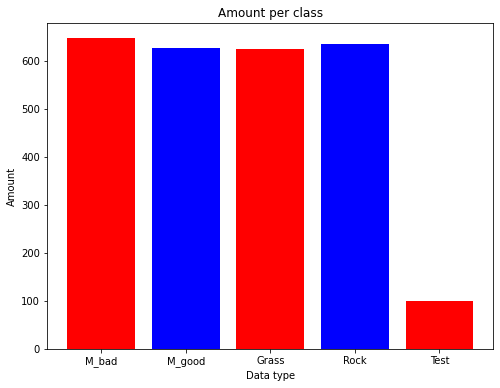

In [9]:
#df.count()[:(len(df.columns)-1)]
#df.columns[:(len(df.columns)-1)]
bar_plot(df)

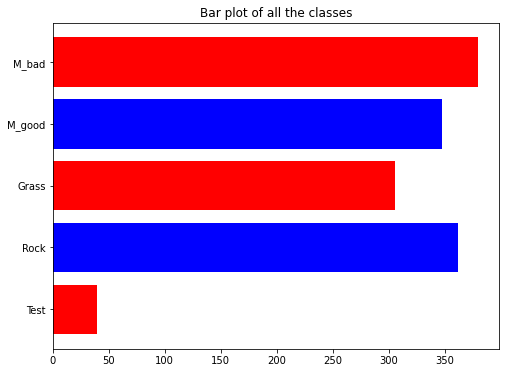

In [13]:
#Create indexes for the names on the y-axis
y_pos = np.arange(len(df.count()))               
 
# Create horizontal bars
plt.figure(figsize=(8,6))
plt.barh(y_pos, df.count(),color=['red','blue'])
 
# Create names on the x-axis
plt.yticks(y_pos, df.columns)
plt.gca().invert_yaxis()
plt.title('Bar plot of all the classes')
#save the file
plt.savefig('C:/Users/Richie/Desktop/MsC_CME_2/Graduation/C5_barplot_classifier.png',bbox_inches="tight")
# Show graphic
plt.show()



In [11]:
def Create_pie(data_frame,title=str):
    # Creating plot
    material=data_frame.columns[:len(data_frame.columns)-1]
    data=data_frame.count()[:(len(data_frame.columns)-1)]
    fig = plt.figure(figsize =(10, 7))
    plt.title(f'Pie chart {title} set')
    plt.pie(data, labels = material,autopct = '%1.1f')
    plt.savefig(f'C:/Users/Richie/Desktop/MsC_CME_2/Graduation/C5_pie_{title}.png',bbox_inches="tight")
    # show plot
    plt.show()

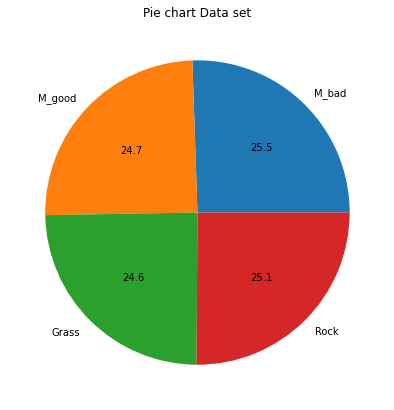

In [12]:
# Creating dataset
#material_train = [df.columns[0],df.columns[2],df.columns[4],df.columns[6]]#['Train_metal_B', 'Train_grass', 'Train_metal_G','Train_rock']
#data_mat_train = [df[f'{x}'].count() for x in material_train]#[241, 196, 197, 138]
#material_val=[df.columns[1],df.columns[3],df.columns[5],df.columns[7]]
#data_mat_val = [df[f'{x}'].count() for x in material_val]
data_name=df.columns[:len(df.columns)-1]#[df.columns[0],df.columns[2],df.columns[4],df.columns[6]]
data_amount=df.count()[:(len(df.columns)-1)]
Create_pie(df,'Data')
#Create_pie(material_val,data_mat_val,'validate')

In [23]:
Text="HighRes_10976.jpg"
df.isin([f"{Text}"]).sum()

Train_metal_B       0
Validate_metal_B    0
Train_grass         0
Validate_grass      0
Train_metal_G       0
Validate_metal_G    0
Train_rock          0
Validate_rock       0
Test                0
dtype: int64

In [28]:
#pd.set_option('display.max_rows', None)
pd.reset_option('max_rows')
#view DataFrame
#df

In [86]:
Text="HighRes_32097.jpg"
df.isin([f"{Text}"]).sum()

M_bad     0
M_good    0
Grass     0
Rock      0
Test      0
dtype: int64

### 4.2 Classification 6 class

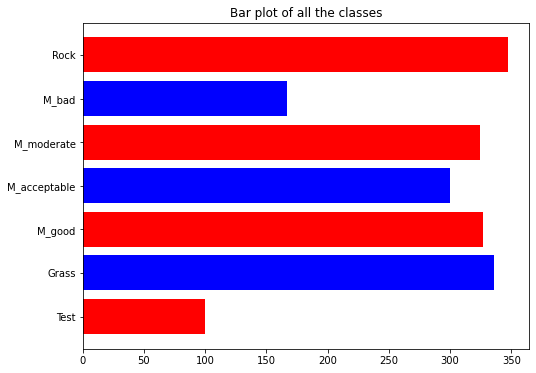

In [20]:
#Create indexes for the names on the y-axis
y_pos = np.arange(len(df6c.count()))               
 
# Create horizontal bars
plt.figure(figsize=(8,6))
plt.barh(y_pos, df6c.count(),color=['red','blue'])
 
# Create names on the x-axis
plt.yticks(y_pos, df6c.columns)
plt.gca().invert_yaxis()
plt.title('Bar plot of all the classes')
#save the file
plt.savefig('C:/Users/Richie/Desktop/MsC_CME_2/Graduation/C5_barplot_classifier_6c.png',bbox_inches="tight")
# Show graphic
plt.show()

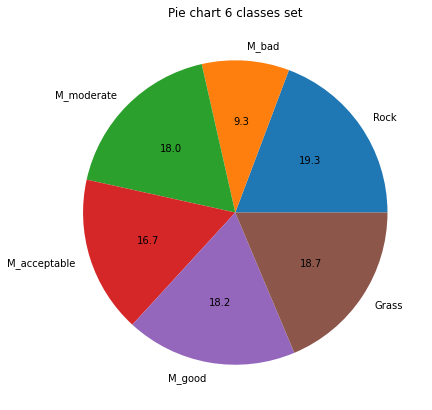

In [21]:
Create_pie(df6c,'6 classes')

### 4.3 Object detection

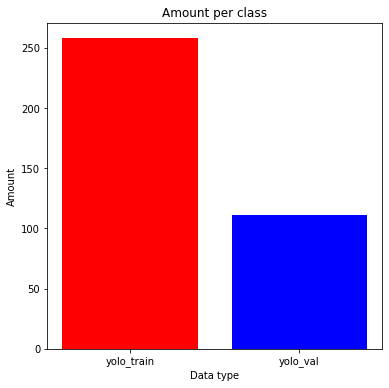

In [8]:
bar_plot(df_od,6)

## 5.0 Look up
This section contains the code needed to find which images belongs to a certain score from digigids. The coordinates would be looked up in a report from Heijmans and coupled with the csv from W+B. We needed data when classifying with 4 classes according to DIGIGIDS2019.
<br><br>
We created four subdata frames that contain names of images classified as good, acceptable, moderate and bad. These were taken from the report of Heijmans. The main data-frame is from the file HighResolution_Positions.csv found in the W+B server. 

In [22]:
#load csv
df_ser=pd.read_csv('C:/Users/Richie/Desktop/MsC_CME_2/Graduation/Witteveen_data/01-Data/HighResolution_Positions.csv',index_col='Filename') 
#Drop unnecessary columns 
df_ser.drop(['SurveyName', 'ORIG_Name','cameraLon','cameraLat','cameraAlt'], axis=1, inplace=True)

In [23]:
#Important functions
#function to look up with coordinates
def coordin_find(point,df_full,ranges=25):
    df_full=df_full.loc[df_full['cameraY'].between(point[1]-ranges,point[1]+ranges)] #Create subdata frame from Y coordinats
    df_full=df_full.loc[df_full['cameraX'].between(point[0]-ranges,point[0]+ranges)] #From that subdata create from the X coordinates
    return df_full

#Function to join Dataframes
def Join_Frames(Start_df, List_coord):
    for p in List_coord:
        df2=coordin_find(p,df_ser)                              #Create dataframe from point
        Start_df=pd.concat([Start_df,df2],ignore_index=False)   #Concatenate start df with new df
    Start_df.sort_values(by=['Filename'], inplace=True)         #Sort the dataframe
    return Start_df

### 5.1 Bad

In [30]:
#Check if image is in train or test set
Text="HighRes_06264.jpg"
df.isin([f"{Text}"]).sum()

M_bad     0
M_good    0
Grass     0
Rock      0
Test      0
dtype: int64

In [21]:
coordin_find((254796.09,592722.90),df_ser)#16410 #22190

,cameraX,cameraY,cameraZ
Filename,,,
HighRes_20369,254784.405,592698.244,4.30
HighRes_20370,254792.028,592700.407,4.34
HighRes_20371,254800.245,592702.804,4.31
HighRes_20372,254808.727,592705.319,4.30
HighRes_20373,254817.011,592707.717,4.27
HighRes_20388,254817.905,592722.431,3.48
HighRes_20389,254812.411,592720.535,3.49
HighRes_20390,254807.183,592718.645,3.48
HighRes_20391,254802.082,592717.092,3.47


In [29]:
df_bad=coordin_find((195761.88,577762.08),df_ser)   #Start df
list_coord_bad=[(195488.51,577825.35),(195390.33,577768.01),(186048.59,568276.62),(249852.07,590823.29),
(176001.59,556720.70),(175605.42,548818.52),(174609.55,541018.79),
(234973.15,583597.17),(234939.75,583691.58),(236743,92,582801.30),(237117.05,582981.31),(237214.16,583018.64)]       #List of coordinates with score "Bad"

df_bad=Join_Frames(df_bad,list_coord_bad) #7573 #7612#15720 #26303 #39898#33161
df_bad

,cameraX,cameraY,cameraZ
Filename,,,
HighRes_01144,175591.625,548798.728,-0.87
HighRes_01145,175588.432,548806.281,-0.83
HighRes_01146,175585.709,548814.171,-0.82
HighRes_01147,175584.060,548822.287,-0.80
HighRes_01148,175582.410,548830.737,-0.78
HighRes_01149,175580.826,548839.522,-0.75
HighRes_04658,186024.054,568290.388,3.70
HighRes_04659,186028.365,568297.093,3.70
HighRes_07539,195371.427,577749.799,-2.29


### 5.2 Moderate

In [26]:
df_moderate=coordin_find((23665573,582762.56),df_ser) #GRASS37975
list_coord_moderate=[(237241.54,583031.36),(238277.01,583541.94),(252848.26,592057.72),(256461.83,592871.73),(209753.62,583637.93),(203275.74,581527.62),(184771.01,566045.86),(184168.17,565647.16),
(234867.88,583763.22),(234768.10,583849.56),(229743.16,586228.37),(227420.77,586496.51),(220314.67,585716.86),(219743.66,585644.73),(217650.88,585304.34),(215796.62,584913.80),(213572.10,584523.30),
(211237.20,584050.85)]

df_moderate=Join_Frames(df_moderate,list_coord_moderate) #10222 #13804 #14510
df_moderate

,cameraX,cameraY,cameraZ
Filename,,,
HighRes_04089,184149.126,565635.724,0.27
HighRes_04090,184155.010,565637.874,0.18
HighRes_04091,184160.958,565640.580,0.30
HighRes_04092,184166.907,565643.176,0.20
HighRes_04093,184172.790,565645.660,0.24
HighRes_04094,184178.807,565648.033,0.18
HighRes_04095,184184.286,565650.848,0.21
HighRes_04096,184189.761,565654.109,0.23
HighRes_10248,209733.118,583643.222,2.08


### 5.3 Acceptable

In [38]:
#Check if image is in train or test set
Text="HighRes_08333.jpg"
df.isin([f"{Text}"]).sum()

M_bad     0
M_good    0
Grass     0
Rock      0
Test      0
dtype: int64

In [25]:
df_accept=coordin_find((200587.94,579533.35),df_ser)
list_coord_accept=[(176155.68,556834.20),(176071.51,547057.90),(174809.27,541578.73),(174645.49,541148.04),(222366.57,585754.79),(222055.60,585619.80),(215562.11,584859.52),(211464.57,584035.96)]

df_accept=Join_Frames(df_accept,list_coord_accept) #848#8448#10678 #11423
df_accept

,cameraX,cameraY,cameraZ
Filename,,,
HighRes_00818,176062.024,547035.496,-2.02
HighRes_00819,176061.740,547038.945,-1.98
HighRes_00820,176061.724,547042.505,-1.96
HighRes_00821,176061.573,547046.400,-1.90
HighRes_00822,176061.689,547050.740,-1.83
HighRes_00823,176061.269,547054.522,-1.85
HighRes_00824,176061.992,547058.420,-1.85
HighRes_00825,176061.307,547061.199,-1.93
HighRes_00826,176058.020,547059.070,-2.03


### 5.4 Good

In [24]:
#Check if image is in train or test set
Text="HighRes_06174.jpg"
df.isin([f"{Text}"]).sum()

M_bad     0
M_good    0
Grass     0
Rock      0
Test      0
dtype: int64

In [25]:
df_ser.loc['HighRes_06174',:]

cameraX    191492.577
cameraY    575273.744
cameraZ        -0.070
Name: HighRes_06174, dtype: float64

In [24]:
df_good=coordin_find((252835.60,592115.44),df_ser)
list_coord_good=[(186035.42,568303.00),(226494.74,586581.45),(226428.10,586591.25),(226465.23,586561.77),(226358.35,586561.13),(226268.61,586563.23),(222477.89,585863.07),(217426.29,585217.25),
(210527.39,583728.28)]

df_good=Join_Frames(df_good,list_coord_good)
df_good


,cameraX,cameraY,cameraZ
Filename,,,
HighRes_04657,186019.541,568283.904,3.65
HighRes_04658,186024.054,568290.388,3.70
HighRes_04659,186028.365,568297.093,3.70
HighRes_04660,186031.061,568304.900,3.70
HighRes_04661,186034.695,568312.714,3.60
HighRes_04662,186037.790,568320.969,3.60
HighRes_04663,186041.899,568327.784,3.70
HighRes_10457,210504.984,583734.878,0.62
HighRes_10458,210511.517,583735.844,0.60


In [11]:
pd.set_option('display.max_rows', None) #To show all values in dataframe
#f_good #10474 #11877